In [27]:
NAME = "MD"
FIPS = 24

In [28]:
import geopandas as gpd
import pandas as pd
import os
import enum

In [29]:
# class Population(enum.Enum):
#     TOTAL = "Total"
#     HISPA = "Hispanic"
#     WHITE = "White"
#     BLACK = "African American"
#     NATIV = "American Indian and Alaska Native"
#     ASIAN = "Asian American"
#     OTHER = "Other"

In [30]:
DATA_FILEPATH = os.environ.get('CSE_DATA_PATH')

In [31]:
demo = pd.read_csv(DATA_FILEPATH+"/Demo/TOTAL.csv")
block = gpd.read_file(DATA_FILEPATH+'/tl_2020_{f}_tabblock20/tl_2020_{f}_tabblock20.shp'.format(f=FIPS))

/home/diwenliu/anaconda3/envs/geo-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (22,35,36,37,38) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:>

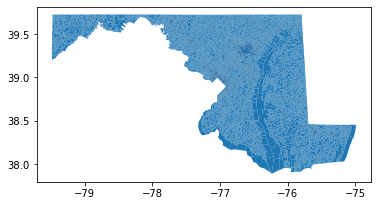

In [32]:
block.plot()

In [33]:
demo

,GISJOIN,YEAR,GEOID,GEOCODE,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,...,NATIV,ASIAN,OTHER,VAP_TOTAL,VAP_HISPA,VAP_WHITE,VAP_BLACK,VAP_NATIV,VAP_ASIAN,VAP_OTHER
0,G24000100001001000,2020,1010000US240010001001000,240010001001000,3,5,Maryland,24,Allegany County,1,...,0,0,0,27,0,27,0,0,0,0
1,G24000100001001001,2020,1010000US240010001001001,240010001001001,3,5,Maryland,24,Allegany County,1,...,0,0,0,2,0,2,0,0,0,0
2,G24000100001001002,2020,1010000US240010001001002,240010001001002,3,5,Maryland,24,Allegany County,1,...,0,0,0,4,1,3,0,0,0,0
3,G24000100001001003,2020,1010000US240010001001003,240010001001003,3,5,Maryland,24,Allegany County,1,...,0,0,0,0,0,0,0,0,0,0
4,G24000100001001004,2020,1010000US240010001001004,240010001001004,3,5,Maryland,24,Allegany County,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675537,G42013300240022032,2020,1010000US421330240022032,421330240022032,1,2,Pennsylvania,42,York County,133,...,0,0,4,33,0,30,0,0,0,3
675538,G42013300240022033,2020,1010000US421330240022033,421330240022033,1,2,Pennsylvania,42,York County,133,...,0,0,0,0,0,0,0,0,0,0
675539,G42013300240022034,2020,1010000US421330240022034,421330240022034,1,2,Pennsylvania,42,York County,133,...,0,0,0,0,0,0,0,0,0,0
675540,G42013300240022035,2020,1010000US421330240022035,421330240022035,1,2,Pennsylvania,42,York County,133,...,0,0,3,52,0,50,0,0,0,2


In [34]:
block = block[['GEOID20','geometry']]
demo = demo[['GEOCODE','COUNTY','VTDA','CDA'] + list(demo.loc[:,"TOTAL":])]

In [35]:
demo['COUNTY'] = demo['COUNTY'].str.replace('County','')
demo['COUNTY'] = demo['COUNTY'].str.replace('.','')
demo['COUNTY'] = demo['COUNTY'].str.upper()
demo['COUNTY'] = demo['COUNTY'].str.strip()
demo.rename(columns={
                    "VTDA": "NUMBER",
                    "CDA": "CD"
                    },inplace = True)

/tmp/ipykernel_750/2885192023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['COUNTY'] = demo['COUNTY'].str.replace('County','')
/tmp/ipykernel_750/2885192023.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  demo['COUNTY'] = demo['COUNTY'].str.replace('.','')
/tmp/ipykernel_750/2885192023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [36]:
demo

,GEOCODE,COUNTY,NUMBER,CD,TOTAL,HISPA,WHITE,BLACK,NATIV,ASIAN,OTHER,VAP_TOTAL,VAP_HISPA,VAP_WHITE,VAP_BLACK,VAP_NATIV,VAP_ASIAN,VAP_OTHER
0,240010001001000,ALLEGANY,01-000,6,31,0,31,0,0,0,0,27,0,27,0,0,0,0
1,240010001001001,ALLEGANY,01-000,6,4,0,4,0,0,0,0,2,0,2,0,0,0,0
2,240010001001002,ALLEGANY,01-000,6,4,1,3,0,0,0,0,4,1,3,0,0,0,0
3,240010001001003,ALLEGANY,01-000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,240010001001004,ALLEGANY,01-000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675537,421330240022032,YORK,250,11,37,0,33,0,0,0,4,33,0,30,0,0,0,3
675538,421330240022033,YORK,250,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
675539,421330240022034,YORK,250,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0
675540,421330240022035,YORK,260,11,59,0,56,0,0,0,3,52,0,50,0,0,0,2


In [37]:
block

,GEOID20,geometry
0,240010020005020,"POLYGON ((-78.85110 39.57919, -78.85092 39.579..."
1,240010023004006,"POLYGON ((-78.78502 39.66924, -78.78452 39.669..."
2,240010017003052,"POLYGON ((-78.90393 39.64914, -78.90337 39.649..."
3,240010015031011,"POLYGON ((-78.82795 39.69977, -78.82789 39.699..."
4,240010020004027,"POLYGON ((-78.85083 39.58438, -78.84972 39.584..."
...,...,...
83822,240253011072007,"POLYGON ((-76.31053 39.46824, -76.31035 39.468..."
83823,240253017061011,"POLYGON ((-76.22264 39.49374, -76.22248 39.493..."
83824,240253034002002,"POLYGON ((-76.37354 39.50460, -76.37340 39.505..."
83825,240253029021009,"POLYGON ((-76.16708 39.50731, -76.16690 39.507..."


In [38]:
block.rename(columns={
                "GEOID20": "GEOCODE"
                }, 
            inplace = True)
block["GEOCODE"] = block["GEOCODE"].astype(int)

/home/diwenliu/anaconda3/envs/geo-env/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/home/diwenliu/anaconda3/envs/geo-env/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:
result = block.merge(demo, how = 'inner', on=['GEOCODE'])

In [40]:
zz = result[result['CD'] == "ZZ"]
result = result[result['CD'] != "ZZ"]
result['CD'] = result['CD'].apply(int)
result = result.append(zz)

In [41]:
result.drop(["GEOCODE"], axis = 1,inplace = True)

In [42]:
result.to_crs(crs = 'EPSG:3857', inplace = True )

In [43]:
block

,GEOCODE,geometry
0,240010020005020,"POLYGON ((-78.85110 39.57919, -78.85092 39.579..."
1,240010023004006,"POLYGON ((-78.78502 39.66924, -78.78452 39.669..."
2,240010017003052,"POLYGON ((-78.90393 39.64914, -78.90337 39.649..."
3,240010015031011,"POLYGON ((-78.82795 39.69977, -78.82789 39.699..."
4,240010020004027,"POLYGON ((-78.85083 39.58438, -78.84972 39.584..."
...,...,...
83822,240253011072007,"POLYGON ((-76.31053 39.46824, -76.31035 39.468..."
83823,240253017061011,"POLYGON ((-76.22264 39.49374, -76.22248 39.493..."
83824,240253034002002,"POLYGON ((-76.37354 39.50460, -76.37340 39.505..."
83825,240253029021009,"POLYGON ((-76.16708 39.50731, -76.16690 39.507..."


In [44]:
result

,geometry,COUNTY,NUMBER,CD,TOTAL,HISPA,WHITE,BLACK,NATIV,ASIAN,OTHER,VAP_TOTAL,VAP_HISPA,VAP_WHITE,VAP_BLACK,VAP_NATIV,VAP_ASIAN,VAP_OTHER
0,"POLYGON ((-8777664.611 4804978.841, -8777644.2...",ALLEGANY,07-002,6,61,0,57,2,0,0,2,41,0,39,2,0,0,0
1,"POLYGON ((-8770307.973 4817993.501, -8770252.6...",ALLEGANY,05-004,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-8783545.191 4815086.464, -8783483.2...",ALLEGANY,24-000,6,25,0,24,0,0,0,1,21,0,20,0,0,0,1
3,"POLYGON ((-8775087.260 4822409.405, -8775080.5...",ALLEGANY,20-000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"POLYGON ((-8777634.000 4805727.167, -8777510.2...",ALLEGANY,07-001,6,4,1,3,0,0,0,0,4,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83822,"POLYGON ((-8494849.471 4788967.281, -8494829.0...",HARFORD,01-013,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
83823,"POLYGON ((-8485065.398 4792644.489, -8485047.3...",HARFORD,01-020,2,79,5,29,35,4,1,5,44,1,14,21,4,1,3
83824,"POLYGON ((-8501863.827 4794210.927, -8501848.2...",HARFORD,03-007,1,21,1,17,0,0,3,0,21,1,17,0,0,3,0
83825,"POLYGON ((-8478880.163 4794602.919, -8478860.4...",HARFORD,02-015,2,25,5,15,3,0,0,2,23,5,13,3,0,0,2


In [45]:
result.set_index(str(FIPS) + "B" + result.index.astype(str),inplace = True)

In [46]:
from gerrychain import Graph, Partition, Election

In [47]:
graph = Graph.from_geodataframe(result)

/home/diwenliu/anaconda3/envs/geo-env/lib/python3.9/site-packages/gerrychain/graph/adjacency.py:21: ShapelyDeprecationWarning: Setting custom attributes on geometry objects is deprecated, and will raise an AttributeError in Shapely 2.0
  geometries[i].id = i


In [48]:
result["NEIGHBORS"] = None  
result["BORDER"] = None

In [49]:
for index, row in result.iterrows():  
    result.at[index,"NEIGHBORS"] = ",".join(
        [str(n[0]) for n in graph.adj[index].items() if n[1]["shared_perim"]*3.281 >= 100]
    )
    result.at[index,"BORDER"] = False
    for n in graph.adj[index].items():
        if result.loc[n[0]].CD != row.CD:
            result.at[index,"BORDER"] = True
            break

In [50]:
result.to_crs(crs = 'EPSG:4326', inplace = True)

In [51]:
result

,geometry,COUNTY,NUMBER,CD,TOTAL,HISPA,WHITE,BLACK,NATIV,ASIAN,OTHER,VAP_TOTAL,VAP_HISPA,VAP_WHITE,VAP_BLACK,VAP_NATIV,VAP_ASIAN,VAP_OTHER,NEIGHBORS,BORDER
24B0,"POLYGON ((-78.85110 39.57919, -78.85092 39.579...",ALLEGANY,07-002,6,61,0,57,2,0,0,2,41,0,39,2,0,0,0,"24B20950,24B27732,24B24938,24B75937,24B21913,2...",False
24B1,"POLYGON ((-78.78502 39.66924, -78.78452 39.669...",ALLEGANY,05-004,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"24B22450,24B11456,24B13364,24B78230,24B15956,2...",False
24B2,"POLYGON ((-78.90393 39.64914, -78.90337 39.649...",ALLEGANY,24-000,6,25,0,24,0,0,0,1,21,0,20,0,0,0,1,"24B1536,24B30415,24B74759,24B47302",False
24B3,"POLYGON ((-78.82795 39.69977, -78.82789 39.699...",ALLEGANY,20-000,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"24B36897,24B78780,24B39647",False
24B4,"POLYGON ((-78.85083 39.58437, -78.84972 39.584...",ALLEGANY,07-001,6,4,1,3,0,0,0,0,4,1,3,0,0,0,0,"24B17065,24B53598,24B48084,24B31738,24B14086,2...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24B83822,"POLYGON ((-76.31053 39.46824, -76.31035 39.468...",HARFORD,01-013,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"24B54945,24B65376,24B78401,24B78560",False
24B83823,"POLYGON ((-76.22264 39.49374, -76.22248 39.493...",HARFORD,01-020,2,79,5,29,35,4,1,5,44,1,14,21,4,1,3,"24B5344,24B14324,24B24933,24B36793",False
24B83824,"POLYGON ((-76.37354 39.50460, -76.37340 39.505...",HARFORD,03-007,1,21,1,17,0,0,3,0,21,1,17,0,0,3,0,"24B27536,24B38060,24B49651,24B54943,24B71988,2...",False
24B83825,"POLYGON ((-76.16708 39.50732, -76.16690 39.507...",HARFORD,02-015,2,25,5,15,3,0,0,2,23,5,13,3,0,0,2,"24B27543,24B30973,24B40491,24B60190,24B60878,2...",False


In [52]:
result.to_file('./{f}_Block.geojson'.format(f=NAME), driver='GeoJSON')  